# Call libraries

In [3]:
import pandas as pd
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup


import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

!conda install -c districtdatalabs yellowbrick
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer # To get an elbow visualizer method for K

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         289 KB

The following NEW packages will be INSTALLED:

    pytest-runner: 5.2-py_0                   
    yellowbrick:   1.1-py36_0 districtdatalabs


pytest-runner-5.2    | 13 KB     | ##################################### | 100% 
yellowbrick-1.1      | 276 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

# Scrape my City list from webpage

In [4]:
url='http://atlanta.metroguide.com/list_of_cities.htm'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
#print(soup.prettify())


# Create my first datable with the webpage list

In [5]:
right_table=soup.find('table', class_='rsTbl')
d = {i.text for i in right_table.find_all('a')}

In [6]:
df=pd.DataFrame(d,columns=['City'])
df = df.sort_values(by=['City'], ascending = True)
df.reset_index(drop=True, inplace=True)
df.head()

,City
0,Acworth
1,Alpharetta
2,Atlanta
3,Auburn
4,Austell


# I call my first dataset with the coordinates

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
# The code was removed by Watson Studio for sharing.

,Zip,City,Latitude,Longitude
0,30417,Claxton,32.162077,-81.90984
1,31814,Louvale,32.154164,-84.83857
2,30821,Norwood,33.477946,-82.73454
3,30452,Register,32.327219,-81.89818
4,30025,Social Circle,33.650720,-83.70779


In [9]:
df_lonlat = df_lonlat.drop_duplicates(subset=['City'])
df_lonlat = df_lonlat.sort_values(by=['City'], ascending = True)
df_lonlat.reset_index(drop=True, inplace=True)
df_lonlat.head()

,Zip,City,Latitude,Longitude
0,31001,Abbeville,31.972626,-83.33082
1,30102,Acworth,34.097998,-84.61830
2,30103,Adairsville,34.368647,-84.92452
3,31620,Adel,31.133004,-83.42736
4,31002,Adrian,32.549854,-82.56948


# I call my dataset with the house pricing

In [10]:
# The code was removed by Watson Studio for sharing.

,"Atlanta-Sandy Springs-Roswell Metro, GA Zillow Home Value Index - All Homes",COLUMN2,COLUMN3,COLUMN4,COLUMN5,COLUMN6,COLUMN7,COLUMN8,COLUMN9,COLUMN10,COLUMN11,COLUMN12,COLUMN13,COLUMN14,COLUMN15,COLUMN16,COLUMN17,COLUMN18,COLUMN19,COLUMN20,COLUMN21,COLUMN22,COLUMN23,COLUMN24,COLUMN25,COLUMN26,COLUMN27,COLUMN28,COLUMN29,COLUMN30,COLUMN31,COLUMN32,COLUMN33,COLUMN34,COLUMN35,COLUMN36,COLUMN37,COLUMN38,COLUMN39,COLUMN40,COLUMN41,COLUMN42,COLUMN43,COLUMN44,COLUMN45,COLUMN46,COLUMN47,COLUMN48,COLUMN49,COLUMN50,COLUMN51,COLUMN52,COLUMN53,COLUMN54,COLUMN55,COLUMN56,COLUMN57,COLUMN58,COLUMN59,COLUMN60,COLUMN61,COLUMN62,COLUMN63,COLUMN64,COLUMN65,COLUMN66,COLUMN67,COLUMN68,COLUMN69,COLUMN70,COLUMN71,COLUMN72,COLUMN73,COLUMN74,COLUMN75,COLUMN76,COLUMN77,COLUMN78,COLUMN79,COLUMN80,COLUMN81,COLUMN82,COLUMN83,COLUMN84,COLUMN85,COLUMN86,COLUMN87,COLUMN88,COLUMN89,COLUMN90,COLUMN91,COLUMN92,COLUMN93,COLUMN94,COLUMN95,COLUMN96,COLUMN97,COLUMN98,COLUMN99,COLUMN100,COLUMN101,COLUMN102,COLUMN103,COLUMN104,COLUMN105,COLUMN106,COLUMN107,COLUMN108,COLUMN109,COLUMN110,COLUMN111,COLUMN112,COLUMN113,COLUMN114,COLUMN115,COLUMN116,COLUMN117,COLUMN118,COLUMN119,COLUMN120,COLUMN121,COLUMN122,COLUMN123
0,Region Name,Region Type,Data Type,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020
1,Atlanta-Sandy Springs-Roswell Metro,metro,All Homes,"$156,200","$156,100","$155,700","$154,200","$152,200","$149,800","$147,800","$145,900","$144,400","$142,800","$141,500","$139,600","$137,600","$135,200","$133,100","$131,500","$130,900","$131,000","$131,100","$130,900","$130,000","$129,500","$128,900","$129,400","$130,000","$130,900","$131,900","$132,900","$133,400","$133,400","$133,500","$134,400","$135,700","$137,300","$139,000","$140,700","$142,300","$144,100","$146,000","$148,000","$150,100","$152,500","$154,900","$156,800","$158,700","$160,300","$161,700","$162,700","$163,800","$164,600","$165,300","$166,300","$167,200","$168,100","$168,800","$169,700","$170,500","$171,300","$172,100","$172,700","$173,500","$174,600","$175,800","$176,800","$177,800","$178,700","$179,700","$180,500","$181,300","$182,300","$183,400","$184,800","$186,200","$187,400","$188,200","$188,900","$189,700","$190,400","$191,500","$192,700","$194,100","$195,200","$196,400","$197,500","$198,700","$200,000","$201,500","$203,200","$204,500","$206,200","$207,600","$209,300","$211,000","$212,900","$214,800","$216,200","$217,600","$219,100","$220,800","$222,500","$224,100","$225,700","$227,300","$228,800","$229,900","$230,800","$231,500","$232,600","$233,800","$235,000","$235,800","$236,600","$237,500","$238,400","$239,200","$239,900","$240,800","$241,900","$243,000","$244,100"
2,Acworth,city,All Homes,"$180,300","$180,000","$178,700","$175,900","$172,600","$169,000","$166,500","$163,800","$161,800","$159,600","$158,100","$156,200","$154,200","$151,800","$149,500","$148,300","$148,600","$149,300","$149,300","$149,200","$148,700","$149,400","$149,100","$150,000","$150,200","$151,100","$152,

In [11]:
df_price.columns = df_price.iloc[0]
df_price=df_price.drop([0], axis=0)
df_price.head()


,Region Name,Region Type,Data Type,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020
1,Atlanta-Sandy Springs-Roswell Metro,metro,All Homes,"$156,200","$156,100","$155,700","$154,200","$152,200","$149,800","$147,800","$145,900","$144,400","$142,800","$141,500","$139,600","$137,600","$135,200","$133,100","$131,500","$130,900","$131,000","$131,100","$130,900","$130,000","$129,500","$128,900","$129,400","$130,000","$130,900","$131,900","$132,900","$133,400","$133,400","$133,500","$134,400","$135,700","$137,300","$139,000","$140,700","$142,300","$144,100","$146,000","$148,000","$150,100","$152,500","$154,900","$156,800","$158,700","$160,300","$161,700","$162,700","$163,800","$164,600","$165,300","$166,300","$167,200","$168,100","$168,800","$169,700","$170,500","$171,300","$172,100","$172,700","$173,500","$174,600","$175,800","$176,800","$177,800","$178,700","$179,700","$180,500","$181,300","$182,300","$183,400","$184,800","$186,200","$187,400","$188,200","$188,900","$189,700","$190,400","$191,500","$192,700","$194,100","$195,200","$196,400","$197,500","$198,700","$200,000","$201,500","$203,200","$204,500","$206,200","$207,600","$209,300","$211,000","$212,900","$214,800","$216,200","$217,600","$219,100","$220,800","$222,500","$224,100","$225,700","$227,300","$228,800","$229,900","$230,800","$231,500","$232,600","$233,800","$235,000","$235,800","$236,600","$237,500","$238,400","$239,200","$239,900","$240,800","$241,900","$243,000","$244,100"
2,Acworth,city,All Homes,"$180,300","$180,000","$178,700","$175,900","$172,600","$169,000","$166,500","$163,800","$161,800","$159,600","$158,100","$156,200","$154,200","$151,800","$149,500","$148,300","$148,600","$149,300","$149,300","$149,200","$148,700","$149,400","$149,100","$150,000","$150,200","$151,100","$152,400","$153,600","$153,600","$153,100","$153,500","$154,900","$156,200","$157,100","$158,100","$159,300","$161,300","$163,600","$165,700","$167,600","$169,800","$172,700","$175,000","$176,000","$176,900","$178,000","$179,600","$180,800","$181,500","$181,600","$181,600","$182,200","$182,900","$183,500","$184,100","$185,300","$186,600","$187,800","$188,300","$188,500","$188,900","$190,300","$191,900","$192,800","$193,900","$194,700","$196,000","$196,800","$197,700","$198,700","$200,100","$202,200","$204,100","$205,200","$205,700","$206,200","$206,800","$207,400","$208,100","$208,900","$210,100","$211,100","$211,800","$212,600","$213,700","$215,200","$216,900","$218,800","$220,200","$221,900","$223,400","$225,100","$227,200","$229,000","$231,100","$231,800","$232,600","$233,200","$234,800","$236,500","$237,900","$239,000","$240,400","$242,300","$243,600","$244,900","$245,300","$246,800","$248,000","$249,800","$250,500","$251,100","$252,100","$253,300","$254,400","$254,900","$255,500","$256,300","$257,700","$258,900"
3,Adairsville,city,All Homes,"$114,600","$114,300","$114,000","$113,600","$113,200","$112,500","$111,900","$111,000","$110,300","$109,300","$108,500","$107,600","$106

In [12]:
df_price_cities = df_price[df_price['Region Type'] == 'city']
df_price_cities.head()

,Region Name,Region Type,Data Type,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020
2,Acworth,city,All Homes,"$180,300","$180,000","$178,700","$175,900","$172,600","$169,000","$166,500","$163,800","$161,800","$159,600","$158,100","$156,200","$154,200","$151,800","$149,500","$148,300","$148,600","$149,300","$149,300","$149,200","$148,700","$149,400","$149,100","$150,000","$150,200","$151,100","$152,400","$153,600","$153,600","$153,100","$153,500","$154,900","$156,200","$157,100","$158,100","$159,300","$161,300","$163,600","$165,700","$167,600","$169,800","$172,700","$175,000","$176,000","$176,900","$178,000","$179,600","$180,800","$181,500","$181,600","$181,600","$182,200","$182,900","$183,500","$184,100","$185,300","$186,600","$187,800","$188,300","$188,500","$188,900","$190,300","$191,900","$192,800","$193,900","$194,700","$196,000","$196,800","$197,700","$198,700","$200,100","$202,200","$204,100","$205,200","$205,700","$206,200","$206,800","$207,400","$208,100","$208,900","$210,100","$211,100","$211,800","$212,600","$213,700","$215,200","$216,900","$218,800","$220,200","$221,900","$223,400","$225,100","$227,200","$229,000","$231,100","$231,800","$232,600","$233,200","$234,800","$236,500","$237,900","$239,000","$240,400","$242,300","$243,600","$244,900","$245,300","$246,800","$248,000","$249,800","$250,500","$251,100","$252,100","$253,300","$254,400","$254,900","$255,500","$256,300","$257,700","$258,900"
3,Adairsville,city,All Homes,"$114,600","$114,300","$114,000","$113,600","$113,200","$112,500","$111,900","$111,000","$110,300","$109,300","$108,500","$107,600","$106,800","$106,000","$105,300","$104,800","$104,300","$103,800","$103,300","$103,000","$102,600","$102,400","$102,200","$102,200","$102,100","$102,100","$102,000","$102,000","$102,000","$102,200","$102,500","$102,900","$103,400","$104,100","$104,700","$105,300","$105,800","$106,400","$107,000","$107,600","$108,200","$108,900","$109,600","$110,200","$110,800","$111,200","$111,700","$112,200","$113,000","$113,600","$114,300","$114,900","$115,500","$116,200","$116,900","$117,500","$118,100","$118,700","$119,200","$119,600","$120,000","$120,500","$121,200","$122,100","$122,900","$123,400","$123,700","$124,400","$125,000","$125,900","$126,700","$127,600","$128,300","$129,200","$129,800","$130,400","$130,800","$131,200","$132,000","$132,600","$133,800","$134,800","$136,000","$137,000","$138,300","$139,400","$140,400","$141,400","$142,500","$143,800","$145,100","$146,400","$147,300","$148,000","$148,300","$148,900","$149,700","$150,600","$152,000","$153,500","$155,000","$156,900","$158,200","$159,900","$161,000","$162,700","$164,300","$165,500","$166,300","$167,200","$167,900","$168,500","$169,100","$169,200","$169,700","$169,900","$170,600","$170,900","$171,300","$171,900"
4,Alpharetta,city,All Homes,"$292,600","$293,900","$293,800","$291,900","$290,200","$287,600","$285,900","$283,600","$283,400","$283,400","$283,400","$281,900","$279,300","$276,900","$275,400

In [13]:
df_price_cities2020=df_price_cities[['Region Name', 'Mar 2020']]
df_price_cities2020.reset_index(drop=True, inplace=True)
df_price_cities2020 = df_price_cities2020.rename(columns={'Region Name': 'City', 'Mar 2020': 'Mar 2020 Price'})
df_price_cities2020.head()

,City,Mar 2020 Price
0,Acworth,"$258,900"
1,Adairsville,"$171,900"
2,Alpharetta,"$426,700"
3,Aragon,"$113,100"
4,Atlanta,"$299,300"


In [14]:
df_price_cities2020['Mar 2020 Price'] = df_price_cities2020['Mar 2020 Price'].replace('[\$\,\.]', '', regex=True).astype(int) #We convert data to int
df_price_cities2020.head()

,City,Mar 2020 Price
0,Acworth,258900
1,Adairsville,171900
2,Alpharetta,426700
3,Aragon,113100
4,Atlanta,299300


# I merge my data sets into one


In [15]:
df_lonlat2 = df_lonlat.merge(df, left_on=['City'], right_on=['City'], how='right')
del df_lonlat2['Zip']
df_lonlat2

,City,Latitude,Longitude
0,Acworth,34.097998,-84.618300
1,Alpharetta,34.080035,-84.219290
2,Atlanta,33.844371,-84.474050
3,Auburn,34.022974,-83.834160
4,Austell,33.797456,-84.606210
5,Avondale Estates,33.772122,-84.264910
6,Blairsville,34.903398,-84.019157
7,Bowdon,33.533934,-85.260880
8,Braselton,34.121974,-83.786040
9,Bremen,33.723939,-85.142820


# Add missing coordinates to cities 

In [16]:
#Chamblee
df_lonlat2.loc[70, 'Latitude'] = 33.892048
df_lonlat2.loc[70, 'Longitude'] = -84.298813
#College Park
df_lonlat2.loc[71, 'Latitude'] = 33.653443
df_lonlat2.loc[71, 'Longitude'] = -84.449373
#Doraville
df_lonlat2.loc[72, 'Latitude'] = 33.895697
df_lonlat2.loc[72, 'Longitude'] = -84.282985
#Dunwoody
df_lonlat2.loc[73, 'Latitude'] = 33.946213
df_lonlat2.loc[73, 'Longitude'] = -84.334648
#Hapeville
df_lonlat2.loc[76, 'Latitude'] = 33.660109
df_lonlat2.loc[76, 'Longitude'] = -84.410205
#Johns Creek
df_lonlat2.loc[77, 'Latitude'] = 34.028927
df_lonlat2.loc[77, 'Longitude'] = -84.198578
#Lake lanier Islands
df_lonlat2.loc[78, 'Latitude'] = 34.177600
df_lonlat2.loc[78, 'Longitude'] = -84.030100
#McDonough
df_lonlat2.loc[80, 'Latitude'] = 33.447334
df_lonlat2.loc[80, 'Longitude'] = -84.146858
#Milton
df_lonlat2.loc[81, 'Latitude'] = 34.1321631
df_lonlat2.loc[81, 'Longitude'] = -84.300666
#Sandy Springs
df_lonlat2.loc[83, 'Latitude'] = 33.935101
df_lonlat2.loc[83, 'Longitude'] = -84.360924
#Vinings
df_lonlat2.loc[84, 'Latitude'] = 33.8648262
df_lonlat2.loc[84, 'Longitude'] = -84.4643744
#Westoak
df_lonlat2.loc[85, 'Latitude'] = 33.9879
df_lonlat2.loc[85, 'Longitude'] = -84.5316



In [17]:
df_lonlat2.shape

(86, 3)

In [18]:
df_atlanta = df_lonlat2.merge(df_price_cities2020, left_on=['City'], right_on=['City'], how='right')
df_atlanta = df_atlanta.dropna()
df_atlanta.shape

(75, 4)

In [19]:
df_atlanta.head()

,City,Latitude,Longitude,Mar 2020 Price
0,Acworth,34.097998,-84.61830,258900
1,Alpharetta,34.080035,-84.21929,426700
2,Atlanta,33.844371,-84.47405,299300
3,Auburn,34.022974,-83.83416,193700
4,Austell,33.797456,-84.60621,178800


# Let's check house prices

In [20]:
atlanta_price = df_atlanta.sort_values('Mar 2020 Price', ascending=True)
atlanta_price = atlanta_price.set_index('City')
atlanta_price = atlanta_price['Mar 2020 Price']
atlanta_price.head()

City
Forest Park     88200
Sunny Side      95400
Tallapoosa     106200
Morrow         135100
Riverdale      138200
Name: Mar 2020 Price, dtype: int64

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


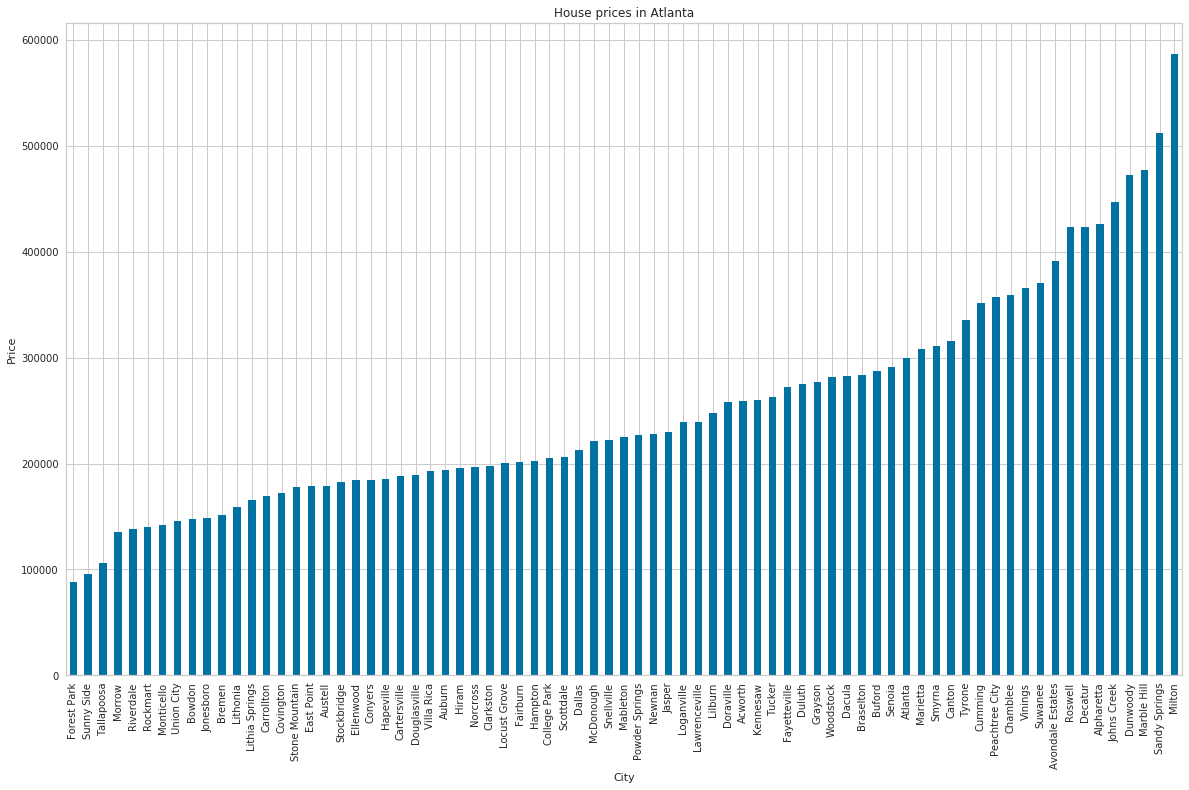

In [21]:
atlanta_price.plot(kind='bar', figsize=(20, 12))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Price') # add y-label to the plot
plt.title('House prices in Atlanta') # add title to the plot

plt.show()

# We divide the house prices into categories

In [22]:
conditions = [
    (df_atlanta['Mar 2020 Price'] <= 200000),
    (df_atlanta['Mar 2020 Price'] > 200000) & (df_atlanta['Mar 2020 Price'] <= 300000),
    (df_atlanta['Mar 2020 Price'] > 300000) & (df_atlanta['Mar 2020 Price'] <= 400000),
    (df_atlanta['Mar 2020 Price'] > 400000)
    ]
values = ['1', '2', '3', '4']

df_atlanta["Price Category"] = np.select(conditions, values)
df_atlanta["Price Category"] = df_atlanta["Price Category"].astype(str).astype(int)
df_atlanta.head()

,City,Latitude,Longitude,Mar 2020 Price,Price Category
0,Acworth,34.097998,-84.61830,258900,2
1,Alpharetta,34.080035,-84.21929,426700,4
2,Atlanta,33.844371,-84.47405,299300,2
3,Auburn,34.022974,-83.83416,193700,1
4,Austell,33.797456,-84.60621,178800,1


In [23]:
df_atlanta

,City,Latitude,Longitude,Mar 2020 Price,Price Category
0,Acworth,34.097998,-84.618300,258900,2
1,Alpharetta,34.080035,-84.219290,426700,4
2,Atlanta,33.844371,-84.474050,299300,2
3,Auburn,34.022974,-83.834160,193700,1
4,Austell,33.797456,-84.606210,178800,1
5,Avondale Estates,33.772122,-84.264910,390900,3
6,Bowdon,33.533934,-85.260880,147900,1
7,Braselton,34.121974,-83.786040,283500,2
8,Bremen,33.723939,-85.142820,151400,1
9,Buford,33.960353,-84.037859,287700,2


In [24]:
df_atlanta.groupby('Price Category').count() # I check how many cities are in each category

,City,Latitude,Longitude,Mar 2020 Price
Price Category,,,,
1,29,29,29,29
2,28,28,28,28
3,10,10,10,10
4,8,8,8,8


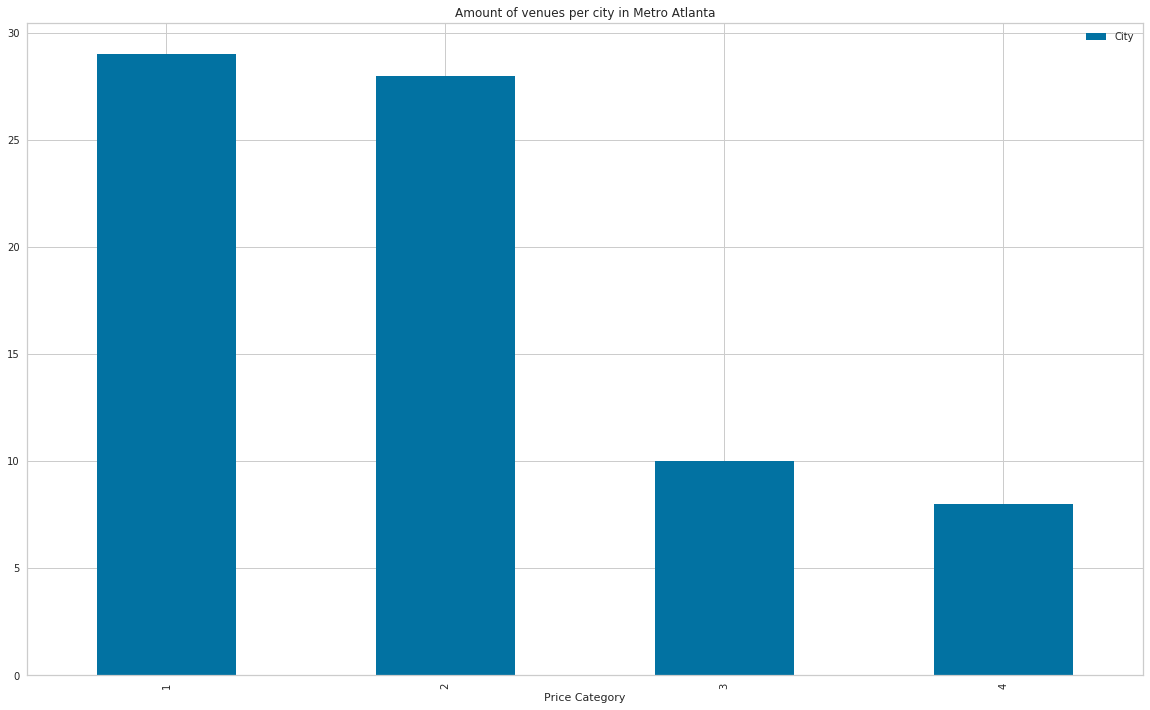

In [70]:
df_atlantapricecat = df_atlanta.groupby('Price Category').count()
del df_atlantapricecat['Longitude']
del df_atlantapricecat['Latitude']
del df_atlantapricecat['Mar 2020 Price']
df_atlantapricecat.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Price Category') # add to x-label to the plot

plt.title('Amount of venues per city in Metro Atlanta') # add title to the plot

plt.show()

# Fix coordinates

In [25]:
#Atlanta
df_atlanta.loc[2, 'Latitude'] = 33.753746
df_atlanta.loc[2, 'Longitude'] = -84.386330
#Alpharetta
df_atlanta.loc[1, 'Latitude'] = 34.075375
df_atlanta.loc[1, 'Longitude'] = -84.294090
#Roswell
df_atlanta.loc[50, 'Latitude'] = 34.022003
df_atlanta.loc[50, 'Longitude'] = -84.361549
#Cartersville
df_atlanta.loc[12, 'Latitude'] = 34.166080
df_atlanta.loc[12, 'Longitude'] = -84.800613
#Dallas
df_atlanta.loc[18, 'Latitude'] = 33.914433
df_atlanta.loc[18, 'Longitude'] = -84.842533
#Acworth
df_atlanta.loc[0, 'Latitude'] = 34.0659329
df_atlanta.loc[0, 'Longitude'] = -84.6768796
#Kennesaw
df_atlanta.loc[32, 'Latitude'] = 34.0234337
df_atlanta.loc[32, 'Longitude'] = -84.6154897
#Jasper
df_atlanta.loc[30, 'Latitude'] = 34.46787
df_atlanta.loc[30, 'Longitude'] = -84.42909
#Canton
df_atlanta.loc[10, 'Latitude'] = 34.234726
df_atlanta.loc[10, 'Longitude'] = -84.488297
#WoodStock
df_atlanta.loc[64, 'Latitude'] = 34.10083293 
df_atlanta.loc[64, 'Longitude'] = -84.51833126
#Smyrna
df_atlanta.loc[53, 'Latitude'] = 33.883991 
df_atlanta.loc[53, 'Longitude'] = -84.514374
#Jonesboro
df_atlanta.loc[31, 'Latitude'] = 33.5215 
df_atlanta.loc[31, 'Longitude'] = -84.35381 
#Covington
df_atlanta.loc[15, 'Latitude'] = 33.59678 
df_atlanta.loc[15, 'Longitude'] = -83.86018


df_atlanta.head()

,City,Latitude,Longitude,Mar 2020 Price,Price Category
0,Acworth,34.065933,-84.67688,258900,2
1,Alpharetta,34.075375,-84.29409,426700,4
2,Atlanta,33.753746,-84.38633,299300,2
3,Auburn,34.022974,-83.83416,193700,1
4,Austell,33.797456,-84.60621,178800,1



# We map out all the cities, it's a huge area!

In [26]:
address = 'Atlanta, GA'

geolocator = Nominatim(user_agent="atlanta_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Atlanta are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Atlanta are 33.7490987, -84.3901849.


In [27]:

map_atlanta = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(df_atlanta['Latitude'], df_atlanta['Longitude'], df_atlanta['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_atlanta)  
    
map_atlanta

In [28]:
# The code was removed by Watson Studio for sharing.

In [29]:
LIMIT= 200

In [30]:

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:

atlanta_venues = getNearbyVenues(names=df_atlanta['City'],
                                   latitudes=df_atlanta['Latitude'],
                                   longitudes=df_atlanta['Longitude']
                                  )

Acworth
Alpharetta
Atlanta
Auburn
Austell
Avondale Estates
Bowdon
Braselton
Bremen
Buford
Canton
Carrollton
Cartersville
Clarkston
Conyers
Covington
Cumming
Dacula
Dallas
Decatur
Douglasville
Duluth
East Point
Ellenwood
Fairburn
Fayetteville
Forest Park
Grayson
Hampton
Hiram
Jasper
Jonesboro
Kennesaw
Lawrenceville
Lilburn
Lithia Springs
Lithonia
Locust Grove
Loganville
Mableton
Marble Hill
Marietta
Monticello
Morrow
Newnan
Norcross
Peachtree City
Powder Springs
Riverdale
Rockmart
Roswell
Scottdale
Senoia
Smyrna
Snellville
Stockbridge
Stone Mountain
Sunny Side
Suwanee
Tallapoosa
Tucker
Tyrone
Union City
Villa Rica
Woodstock
Chamblee
College Park
Doraville
Dunwoody
Hapeville
Johns Creek
McDonough
Milton
Sandy Springs
Vinings


In [32]:
print(atlanta_venues.shape)
atlanta_venues.head()

(3373, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acworth,34.065933,-84.67688,Henry's Louisiana Grill,34.066011,-84.677728,Cajun / Creole Restaurant
1,Acworth,34.065933,-84.67688,Fusco's via Roma,34.065781,-84.677163,Italian Restaurant
2,Acworth,34.065933,-84.67688,Miss L's Sandwich Shop,34.065704,-84.677274,Sandwich Place
3,Acworth,34.065933,-84.67688,Lake Acworth Beach,34.061058,-84.682936,Beach
4,Acworth,34.065933,-84.67688,Oak Barrel,34.066145,-84.678016,Wine Shop


In [33]:
atlanta_venues.groupby('City').count()
print('There are {} uniques categories.'.format(len(atlanta_venues['Venue Category'].unique())))

There are 318 uniques categories.


# We graph the amount of venues per city

In [34]:
atlanta_venueslist = atlanta_venues.groupby('City').count().sort_values('Venue', ascending=True)
atlanta_venueslist = atlanta_venueslist['Venue']

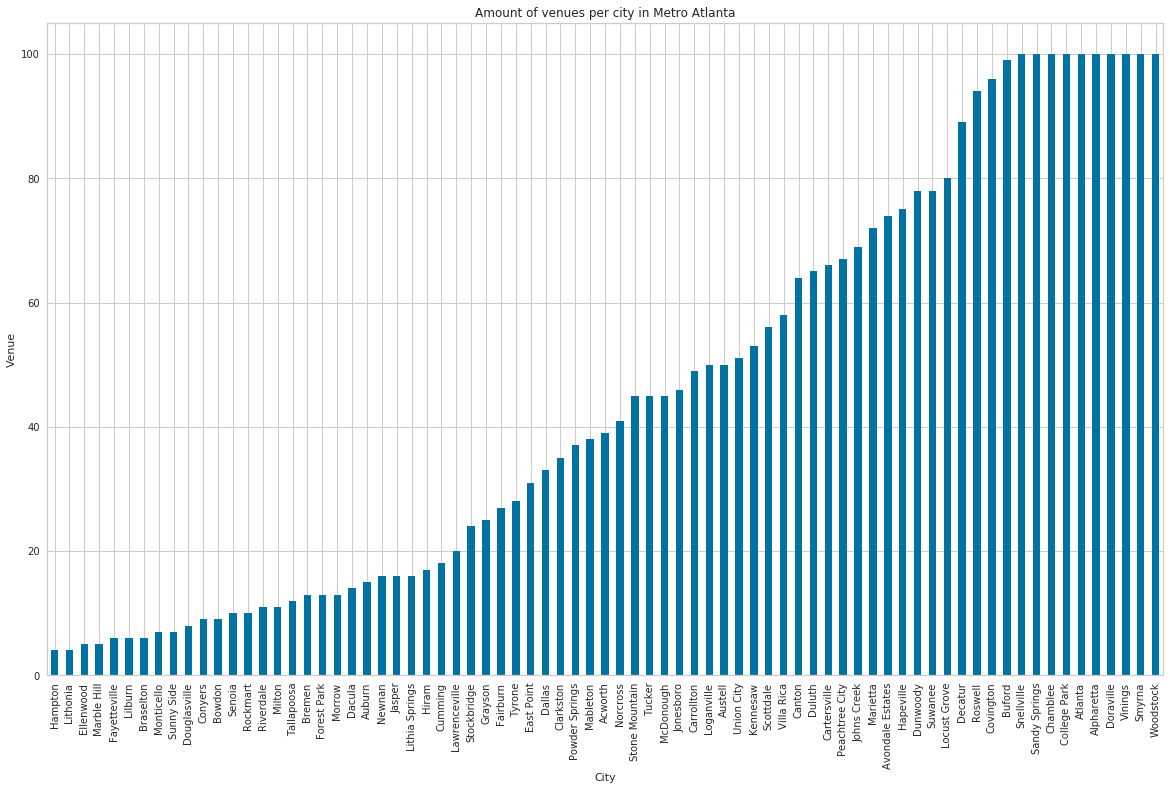

In [35]:

atlanta_venueslist.plot(kind='bar', figsize=(20, 12))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Venue') # add y-label to the plot
plt.title('Amount of venues per city in Metro Atlanta') # add title to the plot

plt.show()

In [36]:
# one hot encoding
atlanta_onehot = pd.get_dummies(atlanta_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
atlanta_onehot['City'] = atlanta_venues['City'] 

# move city column to the first column
atlanta_onehot = atlanta_onehot[ ['City'] + [ col for col in atlanta_onehot.columns if col != 'City' ] ]


atlanta_onehot.head()

,City,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Cemetery,Chaat Place,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Library,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Preschool,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tap

In [37]:
atlanta_grouped = atlanta_onehot.groupby('City').mean().reset_index()
atlanta_grouped
atlanta_grouped.shape

(75, 318)

In [38]:
atlanta_grouped.head()

,City,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Cemetery,Chaat Place,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Library,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Preschool,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tap

# We get the top 5 venues per city

In [39]:

num_top_venues = 5

for City in atlanta_grouped['City']:
    print("----"+City+"----")
    temp = atlanta_grouped[atlanta_grouped['City'] == City].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acworth----
                  venue  freq
0   American Restaurant  0.10
1  Fast Food Restaurant  0.08
2           Pizza Place  0.05
3                Bakery  0.05
4              Pharmacy  0.05


----Alpharetta----
                     venue  freq
0           Clothing Store  0.07
1  New American Restaurant  0.06
2      American Restaurant  0.05
3           Ice Cream Shop  0.03
4     Fast Food Restaurant  0.03


----Atlanta----
                venue  freq
0      History Museum  0.04
1               Hotel  0.04
2         Coffee Shop  0.04
3  Seafood Restaurant  0.03
4                 Bar  0.03


----Auburn----
                        venue  freq
0              Discount Store  0.20
1                   BBQ Joint  0.07
2  Construction & Landscaping  0.07
3               Grocery Store  0.07
4                   City Hall  0.07


----Austell----
                  venue  freq
0  Fast Food Restaurant  0.10
1   Fried Chicken Joint  0.10
2           Gas Station  0.06
3        Sandwich Place  0.0

# Create a new dataframe for top venues for each city

In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [75]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = atlanta_grouped['City']

for ind in np.arange(atlanta_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(atlanta_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Beach,Grocery Store,Lake,Park,Pharmacy
1,Alpharetta,Clothing Store,New American Restaurant,American Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Beer Bar,Plaza,Women's Store,Café
2,Atlanta,Coffee Shop,Hotel,History Museum,Caribbean Restaurant,Bar,American Restaurant,Park,Seafood Restaurant,Burger Joint,BBQ Joint
3,Auburn,Discount Store,Construction & Landscaping,BBQ Joint,Grocery Store,City Hall,Baseball Field,Pharmacy,Sandwich Place,Convenience Store,Pizza Place
4,Austell,Fried Chicken Joint,Fast Food Restaurant,Rental Car Location,Gas Station,Sandwich Place,Breakfast Spot,American Restaurant,Chinese Restaurant,Convenience Store,Liquor Store


# We now cluster cities


In [76]:
# set number of clusters
kclusters = 4


atlanta_grouped_clustering = atlanta_grouped.drop('City', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atlanta_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0], dtype=int32)

# We use a Kelbowvisualizer to estimate our K

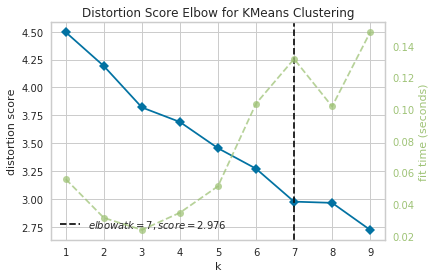

In [77]:
X= atlanta_grouped_clustering
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.poof()


In [78]:
# add clustering labels

#city_venues_sorted.drop(['Cluster Labels'], axis=1)
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [79]:
atlanta_merged = df_atlanta
atlanta_merged = atlanta_merged.join(city_venues_sorted.set_index('City'), on='City')

atlanta_merged.head() 

,City,Latitude,Longitude,Mar 2020 Price,Price Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,34.065933,-84.67688,258900,2,0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Beach,Grocery Store,Lake,Park,Pharmacy
1,Alpharetta,34.075375,-84.29409,426700,4,0,Clothing Store,New American Restaurant,American Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Beer Bar,Plaza,Women's Store,Café
2,Atlanta,33.753746,-84.38633,299300,2,0,Coffee Shop,Hotel,History Museum,Caribbean Restaurant,Bar,American Restaurant,Park,Seafood Restaurant,Burger Joint,BBQ Joint
3,Auburn,34.022974,-83.83416,193700,1,2,Discount Store,Construction & Landscaping,BBQ Joint,Grocery Store,City Hall,Baseball Field,Pharmacy,Sandwich Place,Convenience Store,Pizza Place
4,Austell,33.797456,-84.60621,178800,1,0,Fried Chicken Joint,Fast Food Restaurant,Rental Car Location,Gas Station,Sandwich Place,Breakfast Spot,American Restaurant,Chinese Restaurant,Convenience Store,Liquor Store


In [80]:

atlanta_merged["Cluster Labels"] = pd.to_numeric(atlanta_merged["Cluster Labels"] )#I change the clusters to numeric

# We map out the cities by cluster color

In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, venue in zip(atlanta_merged['Latitude'], atlanta_merged['Longitude'], atlanta_merged['City'], atlanta_merged['Cluster Labels'], atlanta_merged['1st Most Common Venue']):
    label = folium.Popup(str(poi) + ' Top Common Venue: ' + str(venue), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


        
map_clusters

# Check Clusters

In [82]:
atlanta_merged.loc[atlanta_merged['Cluster Labels'] == 0, atlanta_merged.columns[[0] + list(range(5, atlanta_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Beach,Grocery Store,Lake,Park,Pharmacy
1,Alpharetta,0,Clothing Store,New American Restaurant,American Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Beer Bar,Plaza,Women's Store,Café
2,Atlanta,0,Coffee Shop,Hotel,History Museum,Caribbean Restaurant,Bar,American Restaurant,Park,Seafood Restaurant,Burger Joint,BBQ Joint
4,Austell,0,Fried Chicken Joint,Fast Food Restaurant,Rental Car Location,Gas Station,Sandwich Place,Breakfast Spot,American Restaurant,Chinese Restaurant,Convenience Store,Liquor Store
5,Avondale Estates,0,Pizza Place,Sandwich Place,Brewery,Bakery,Thrift / Vintage Store,Gas Station,Breakfast Spot,Pet Store,Gym,Pub
8,Bremen,0,Baseball Field,Plaza,Pharmacy,Fast Food Restaurant,Gas Station,Grocery Store,Rental Car Location,Park,Gym / Fitness Center,Bakery
9,Buford,0,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Gas Station,Grocery Store,American Restaurant,Shipping Store,Coffee Shop,Thrift / Vintage Store,Chinese Restaurant
10,Canton,0,Fast Food Restaurant,Seafood Restaurant,Baseball Field,Pharmacy,Mexican Restaurant,Fried Chicken Joint,Steakhouse,Discount Store,Grocery Store,Pizza Place
11,Carrollton,0,Gym,Fast Food Restaurant,Pizza Place,Video Store,Mexican Restaurant,Grocery Store,Breakfast Spot,Sandwich Place,Coffee Shop,American Restaurant
12,Cartersville,0,Pizza Place,American Restaurant,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Sandwich Place,Discount Store,Salon / Barbershop,Pet Store,Chinese Restaurant


In [83]:
atlanta_merged.loc[atlanta_merged['Cluster Labels'] == 1, atlanta_merged.columns[[0] + list(range(5, atlanta_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Fayetteville,1,Home Service,Construction & Landscaping,Furniture / Home Store,Massage Studio,Soccer Field,Yoga Studio,Film Studio,Eye Doctor,Fabric Shop,Farm
36,Lithonia,1,Construction & Landscaping,Food Service,Gas Station,Health & Beauty Service,Yoga Studio,Film Studio,Event Space,Eye Doctor,Fabric Shop,Farm
57,Sunny Side,1,Construction & Landscaping,Home Service,Park,Furniture / Home Store,Farm,Thrift / Vintage Store,Gas Station,Yoga Studio,Fast Food Restaurant,Event Space


In [84]:
atlanta_merged.loc[atlanta_merged['Cluster Labels'] == 2, atlanta_merged.columns[[0] + list(range(5, atlanta_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Auburn,2,Discount Store,Construction & Landscaping,BBQ Joint,Grocery Store,City Hall,Baseball Field,Pharmacy,Sandwich Place,Convenience Store,Pizza Place
6,Bowdon,2,Mexican Restaurant,Post Office,Pharmacy,Grocery Store,Sandwich Place,Discount Store,Coffee Shop,Fast Food Restaurant,Fish & Chips Shop,Film Studio
7,Braselton,2,Discount Store,Ice Cream Shop,Electronics Store,Train Station,Gift Shop,German Restaurant,Yoga Studio,Eye Doctor,Fabric Shop,Farm
14,Conyers,2,Discount Store,Fried Chicken Joint,Mexican Restaurant,Baseball Field,Restaurant,Pizza Place,Liquor Store,Construction & Landscaping,Food & Drink Shop,Food Court
28,Hampton,2,Baseball Field,Athletics & Sports,Discount Store,Food Truck,Food Stand,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant
30,Jasper,2,American Restaurant,Pharmacy,Discount Store,Pizza Place,Seafood Restaurant,Wings Joint,Mexican Restaurant,Construction & Landscaping,Park,Fast Food Restaurant
34,Lilburn,2,Athletics & Sports,American Restaurant,Football Stadium,Gymnastics Gym,Soccer Field,Video Store,Food,Farmers Market,Food Stand,Event Space
42,Monticello,2,Convenience Store,Grocery Store,New American Restaurant,Health & Beauty Service,Mexican Restaurant,Discount Store,Food & Drink Shop,Food Court,Food,Flower Shop
44,Newnan,2,Pharmacy,Discount Store,Convenience Store,Asian Restaurant,Sandwich Place,Southern / Soul Food Restaurant,Fried Chicken Joint,Baseball Field,Bar,Automotive Shop
49,Rockmart,2,Discount Store,River,Chinese Restaurant,Ice Cream Shop,Pizza Place,American Restaurant,Trail,Video Store,Coffee Shop,Event Space


In [85]:
atlanta_merged.loc[atlanta_merged['Cluster Labels'] == 3, atlanta_merged.columns[[0] + list(range(5, atlanta_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Ellenwood,3,Shopping Mall,Gym / Fitness Center,Park,American Restaurant,Farm,Fast Food Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop


In [86]:
city_venues_sorted2 = city_venues_sorted.groupby('Cluster Labels').count()
city_venues_sorted2 = city_venues_sorted2['1st Most Common Venue']
city_venues_sorted2 = city_venues_sorted2.rename(columns={'1st Most Common Venue': 'Cities'})


city_venues_sorted2

Cluster Labels
0    60
1     3
2    11
3     1
dtype: int64

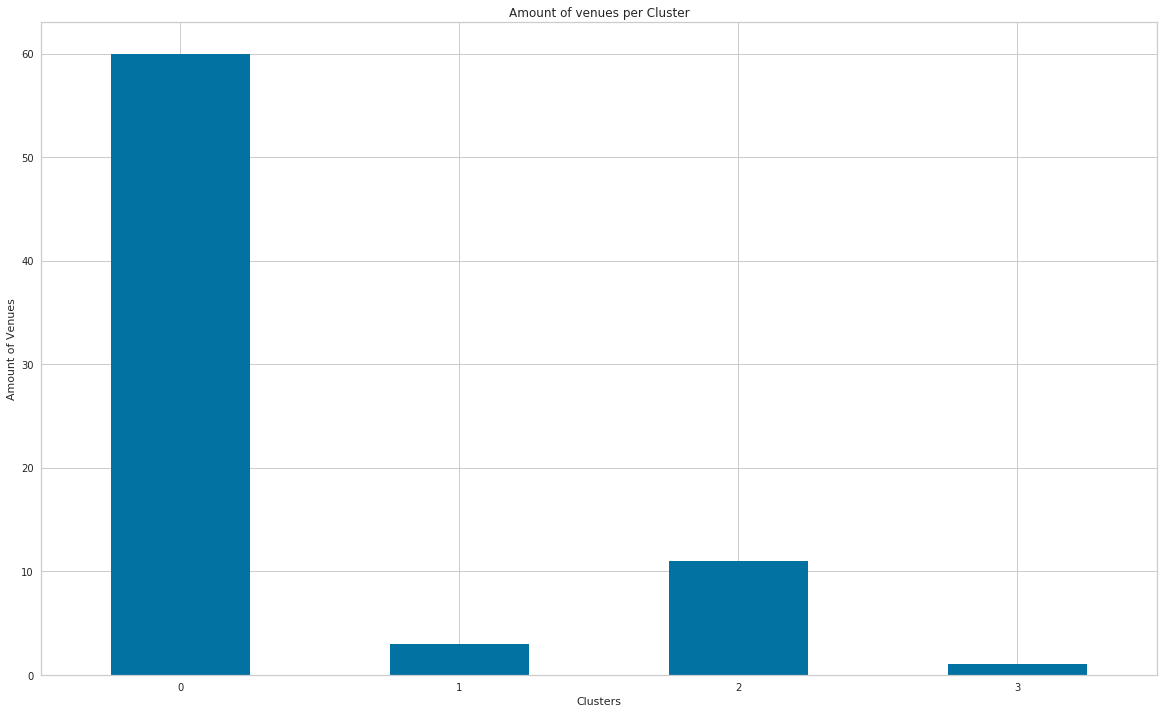

In [87]:
city_venues_sorted2.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Clusters') # add to x-label to the plot
plt.ylabel('Amount of Venues') # add y-label to the plot
plt.title('Amount of venues per Cluster') # add title to the plot
plt.xticks(rotation=0)

plt.show()

In [88]:
city_venues_sorted3 = atlanta_merged[['Cluster Labels','1st Most Common Venue']]
city_venues_sorted3['Amount Venues'] = 1 #I added a number so I could then use the function groupby

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [89]:
city2 = city_venues_sorted3.groupby(['Cluster Labels','1st Most Common Venue'], as_index=False).sum()
city2.head()

,Cluster Labels,1st Most Common Venue,Amount Venues
0,0,American Restaurant,2
1,0,Baseball Field,3
2,0,Breakfast Spot,1
3,0,Burger Joint,1
4,0,Business Service,2


In [90]:
city2 = city2.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Amount Venues')
city2=city2.fillna(0)
city2

1st Most Common Venue,American Restaurant,Athletics & Sports,Baseball Field,Breakfast Spot,Burger Joint,Business Service,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Home Service,Hotel,Ice Cream Shop,Intersection,Mexican Restaurant,Park,Pharmacy,Pizza Place,Pool,Sandwich Place,Shopping Mall,Spa,Trail,Video Store
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,0.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,3.0,1.0,9.0,1.0,7.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0,1.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

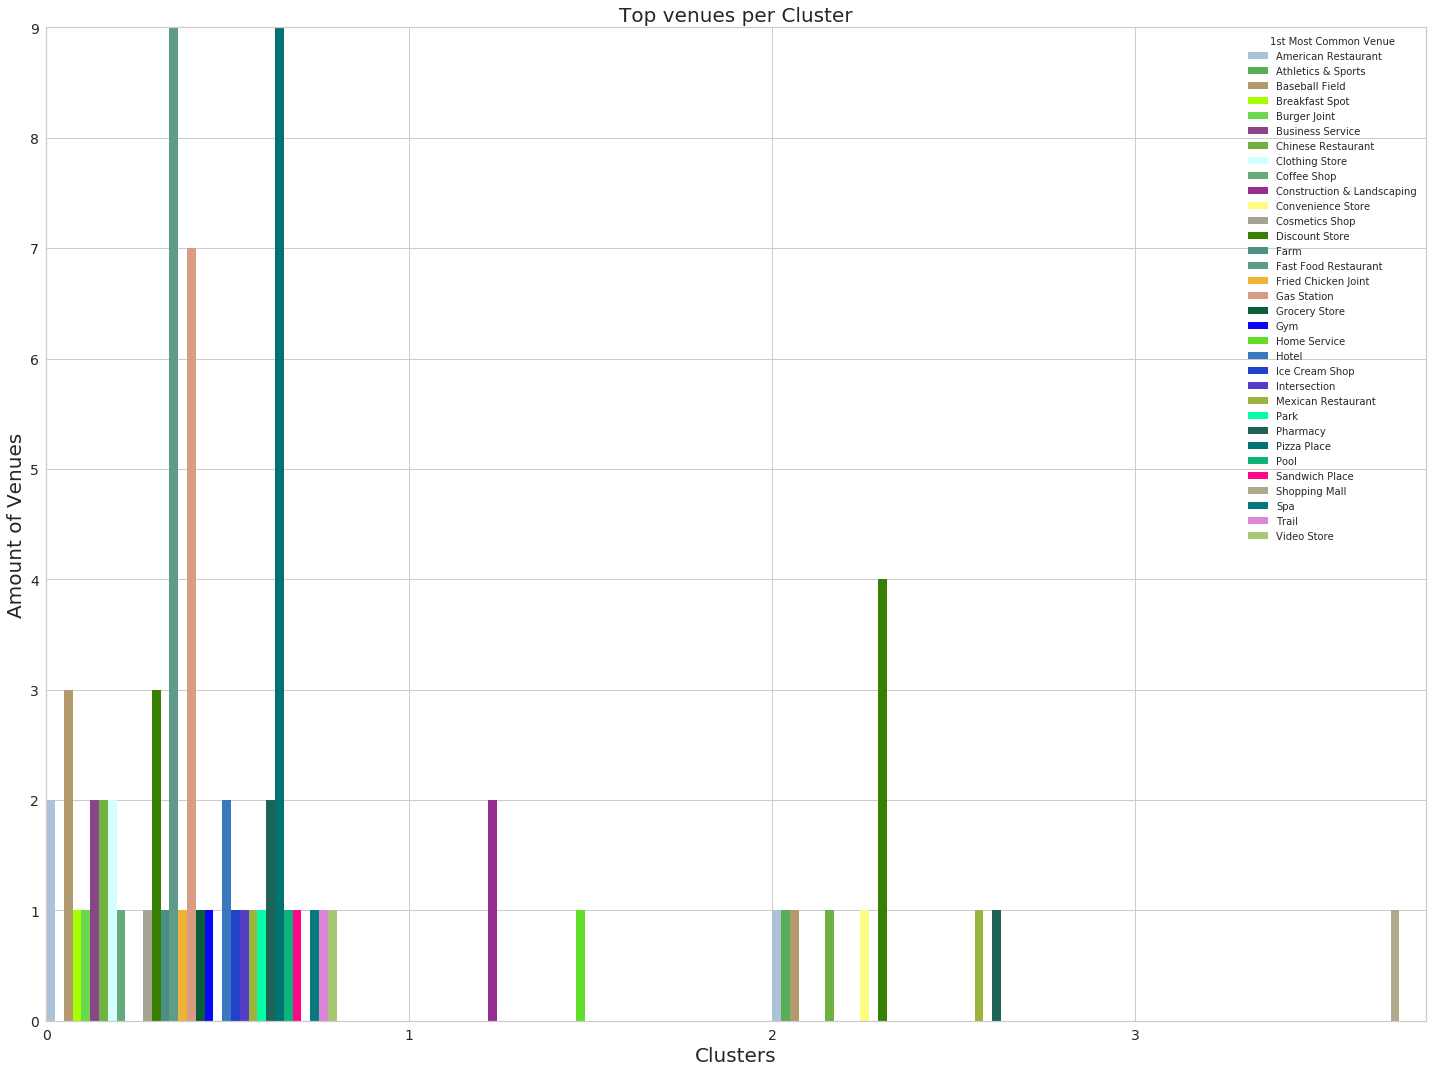

In [92]:
city2.plot(kind='bar', figsize=(20, 15), fontsize=14, align='edge', width=.8, color=colors_list)

plt.xlabel('Clusters', fontsize=20) # add to x-label to the plot
plt.ylabel('Amount of Venues', fontsize=20) # add y-label to the plot
plt.title('Top venues per Cluster', fontsize=20) # add title to the plot
plt.xticks(rotation=0)

plt.tight_layout()
plt.autoscale(tight=True)


plt.show()

# We Get the total venues to use later

In [93]:
atlanta_totalvenues = atlanta_venues.groupby('City').count()
atlanta_totalvenues = atlanta_totalvenues.reset_index()

atlanta_totalvenues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acworth,39,39,39,39,39,39
1,Alpharetta,100,100,100,100,100,100
2,Atlanta,100,100,100,100,100,100
3,Auburn,15,15,15,15,15,15
4,Austell,50,50,50,50,50,50


# We map the cities according to their house prices

In [94]:

atlhouseprice_map = folium.Map(location=[latitude, longitude], zoom_start=9)

colordict = {1: 'green', 2: 'orange', 3: 'red', 4: 'darkred'}

for lat, lon, pricecat, price, city in zip(atlanta_merged['Latitude'], atlanta_merged['Longitude'], atlanta_merged['Price Category'], atlanta_merged['Mar 2020 Price'], atlanta_merged['City']):
    label = folium.Popup('City: ' + str(city) + ',  House Price: ' + str(price))
    folium.CircleMarker(
        [lat, lon],
        #radius = venue*.2, #In case we want to increase the radius of the marker
        popup=label,
        color=colordict[pricecat],
        key_on = pricecat,
        threshold_scale=[1,2,3,4],
        fill_color=colordict[pricecat],
        fill=True,
       fill_opacity=0.5
        ).add_to(atlhouseprice_map)
    
atlhouseprice_map

# We map out house prices and the size of each city increases with the amount of venues (100 max 2km radius)

In [95]:

atlhouseprice_map = folium.Map(location=[latitude, longitude], zoom_start=9)

colordict = {1: 'green', 2: 'orange', 3: 'red', 4: 'darkred'}

for lat, lon, pricecat, price, city, venue in zip(atlanta_merged['Latitude'], atlanta_merged['Longitude'], atlanta_merged['Price Category'], atlanta_merged['Mar 2020 Price'], atlanta_merged['City'], atlanta_totalvenues['Venue']):
    label = folium.Popup('City: ' + str(city) + ',  House Price: ' + str(price))
    folium.CircleMarker(
        [lat, lon],
        radius = venue*.25, #In case we want to increase the radius of the marker
        popup=label,
        color=colordict[pricecat],
        key_on = pricecat,
        threshold_scale=[1,2,3,4],
        fill_color=colordict[pricecat],
        fill=True,
       fill_opacity=0.5
        ).add_to(atlhouseprice_map)
    
atlhouseprice_map

# Our final database

In [96]:
atlanta_merged

,City,Latitude,Longitude,Mar 2020 Price,Price Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,34.065933,-84.676880,258900,2,0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Bakery,Beach,Grocery Store,Lake,Park,Pharmacy
1,Alpharetta,34.075375,-84.294090,426700,4,0,Clothing Store,New American Restaurant,American Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Beer Bar,Plaza,Women's Store,Café
2,Atlanta,33.753746,-84.386330,299300,2,0,Coffee Shop,Hotel,History Museum,Caribbean Restaurant,Bar,American Restaurant,Park,Seafood Restaurant,Burger Joint,BBQ Joint
3,Auburn,34.022974,-83.834160,193700,1,2,Discount Store,Construction & Landscaping,BBQ Joint,Grocery Store,City Hall,Baseball Field,Pharmacy,Sandwich Place,Convenience Store,Pizza Place
4,Austell,33.797456,-84.606210,178800,1,0,Fried Chicken Joint,Fast Food Restaurant,Rental Car Location,Gas Station,Sandwich Place,Breakfast Spot,American Restaurant,Chinese Restaurant,Convenience Store,Liquor Store
5,Avondale Estates,33.772122,-84.264910,390900,3,0,Pizza Place,Sandwich Place,Brewery,Bakery,Thrift / Vintage Store,Gas Station,Breakfast Spot,Pet Store,Gym,Pub
6,Bowdon,33.533934,-85.260880,147900,1,2,Mexican Restaurant,Post Office,Pharmacy,Grocery Store,Sandwich Place,Discount Store,Coffee Shop,Fast Food Restaurant,Fish & Chips Shop,Film Studio
7,Braselton,34.121974,-83.786040,283500,2,2,Discount Store,Ice Cream Shop,Electronics Store,Train Station,Gift Shop,German Restaurant,Yoga Studio,Eye Doctor,Fabric Shop,Farm
8,Bremen,33.723939,-85.142820,151400,1,0,Baseball Field,Plaza,Pharmacy,Fast Food Restaurant,Gas Station,Grocery Store,Rental Car Location,Park,Gym / Fitness Center,Bakery
9,Buford,33.960353,-84.037859,287700,2,0,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Gas Station,Grocery Store,American Restaurant,Shipping Store,Coffee Shop,Thrift / Vintage Store,Chinese Restaurant
